In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-17 19:57:28.054020


# Frekvenssijakauma

Kategorisen muuttujan frekvenssijakauman voin esittää frekvenssitaulukkona tai pylväskaaviona.

Frekvenssitaulukolla tarkoitan taulukkoa, joka sisältää muuttujan arvojen esiintymiskerrat (frekvenssit) ja/tai esiintymiskertojen prosenttiosuudet.

Seuraavassa yksi tapa frekvenssitaulukon ja pylväskaavion laatimiseen.

In [2]:
import pandas as pd

# Grafiikka-kirjaston tuonti
import matplotlib.pyplot as plt

# Tyylimääritys grafiikalle
plt.style.use('seaborn-white')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Koulutuksen numeroarvoja [1, 2, 3, 4] vastaavat tekstimuotoiset arvot listana
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']

In [5]:
# Frekvenssit crosstab-funktiolla
df1 = pd.crosstab(df['koulutus'], 'f')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Tekstimuotoiset arvot numeroiden tilalle
df1.index = koulutus

# Prosentit
n = df1['f'].sum()
df1['f (%)'] = (df1['f'] / n) * 100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Taulukon näyttäminen siten että frekvensseissä ei desimaaleja, mutta prosenteissa yksi desimaali
df1.style.format({'f':'{:.0f}', 'f (%)':'{:.1f}'})

,f,f (%)
Peruskoulu,27,33.3
2. aste,30,37.0
Korkeakoulu,22,27.2
Ylempi korkeakoulu,2,2.5
Yhteensä,81,100.0


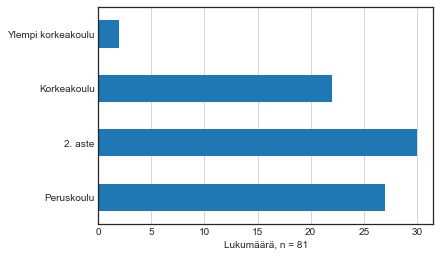

In [6]:
# Vaakapylväskaavio lukumääristä (Yhteensä-rivin tietoja en ota mukaan)
df1.drop('Yhteensä')['f'].plot.barh()

# x-akselin otsikko (n-arvo laskettu edellisessä solussa)
plt.xlabel(f'Lukumäärä, n = {n}')

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

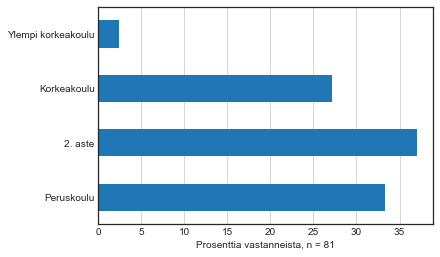

In [7]:
# Vaakapylväskaavio prosenteista
df1.drop('Yhteensä')['f (%)'].plot.barh()

plt.xlabel(f'Prosenttia vastanneista, n = {n}')

plt.grid(axis='x')

# Kaavion tallentaminen
#plt.savefig('prosenttikaavio.png', bbox_inches='tight')

## Lisätietoa

https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/